In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
X_all = pd.read_csv("data/X_train.csv", encoding='cp949')
y_all = pd.read_csv("data/y_train.csv", encoding='cp949')

In [3]:
print(X_all.head())
print(X_all.info())
print(X_all.describe())
print(X_all.corr())

   cust_id      총구매액     최대구매액       환불금액   주구매상품 주구매지점  내점일수   내점당구매건수  \
0        0  68282840  11264000  6860000.0      기타   강남점    19  3.894737   
1        1   2136000   2136000   300000.0     스포츠   잠실점     2  1.500000   
2        2   3197000   1639000        NaN  남성 캐주얼   관악점     2  2.000000   
3        3  16077620   4935000        NaN      기타   광주점    18  2.444444   
4        4  29050000  24000000        NaN      보석  본  점     2  1.500000   

     주말방문비율  구매주기  
0  0.527027    17  
1  0.000000     1  
2  0.000000     1  
3  0.318182    16  
4  0.000000    85  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500

In [4]:
X_all['target']= y_all['gender']
X_all.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,target
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0


In [5]:
man = X_all[X_all['target']==1]['주구매지점'].value_counts()
man

본  점     434
잠실점      169
분당점      154
영등포점      99
부산본점      82
일산점       70
광주점       46
청량리점      37
강남점       37
미아점       30
노원점       28
대전점       25
관악점       19
부평점       17
동래점       17
인천점       16
안양점       15
대구점        5
전주점        5
포항점        4
울산점        3
센텀시티점      3
창원점        1
Name: 주구매지점, dtype: int64

In [6]:
def bar_chart(feature):
    man = X_all[X_all['target']==1][feature].value_counts()
    female = X_all[X_all['target']==0][feature].value_counts()
    df= pd.DataFrame([man, female])
    df.index= ['man','female']
    df.plot(kind='bar', stacked=False, figsize=(10,5))

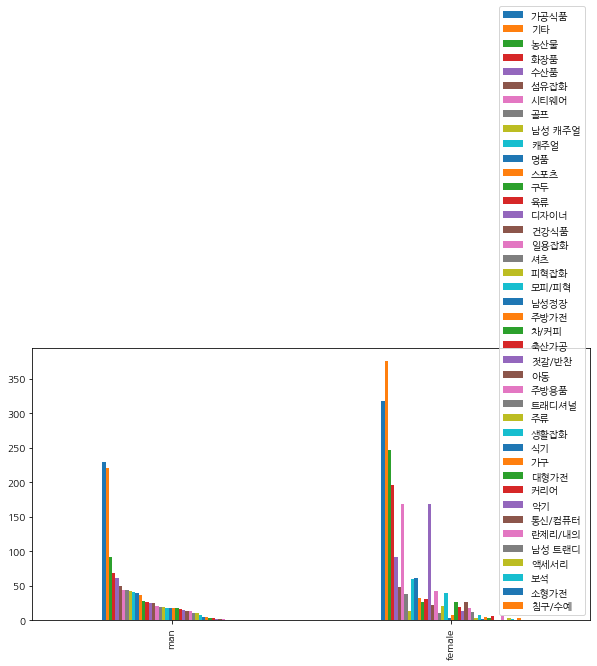

In [7]:
bar_chart('주구매상품')

In [8]:
X_all.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,target
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0


In [9]:
X_all=X_all.drop('주구매지점', axis=1)
X_all

,cust_id,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,주말방문비율,구매주기,target
0,0,68282840,11264000,6860000.0,기타,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,8,1.625000,0.461538,40,1
3497,3497,75000,75000,NaN,주방용품,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,NaN,화장품,2,1.000000,0.000000,39,0


In [10]:
X_all['환불금액']=X_all['환불금액'].fillna(0)
X_all

,cust_id,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,주말방문비율,구매주기,target
0,0,68282840,11264000,6860000.0,기타,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,8,1.625000,0.461538,40,1
3497,3497,75000,75000,0.0,주방용품,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,0.0,화장품,2,1.000000,0.000000,39,0


In [11]:
df_tmp = pd.get_dummies(X_all['주구매상품'])
df_tmp['cust_id']= np.arange(0,3500,1)
df_tmp

,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품,cust_id
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3495
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3496
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3497
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3498


In [12]:
X_all=pd.merge(X_all, df_tmp, on='cust_id')
X_all

,cust_id,총구매액,최대구매액,환불금액,주구매상품,내점일수,내점당구매건수,주말방문비율,구매주기,target,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,0,68282840,11264000,6860000.0,기타,19,3.894737,0.527027,17,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2136000,2136000,300000.0,스포츠,2,1.500000,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3197000,1639000,0.0,남성 캐주얼,2,2.000000,0.000000,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,16077620,4935000,0.0,기타,18,2.444444,0.318182,16,1,...,0,0,0,0,0,0,0,0,0,0
4,4,29050000,24000000,0.0,보석,2,1.500000,0.000000,85,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,1,2.000000,1.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
3496,3496,29628600,7200000,6049600.0,시티웨어,8,1.625000,0.461538,40,1,...,0,0,0,0,0,0,0,0,0,0
3497,3497,75000,75000,0.0,주방용품,1,1.000000,0.000000,0,0,...,1,0,0,0,0,0,0,0,0,0
3498,3498,1875000,1000000,0.0,화장품,2,1.000000,0.000000,39,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X_all=X_all.drop(['cust_id','주구매상품','target'],axis=1)
X_all

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,가공식품,가구,건강식품,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3197000,1639000,0.0,2,2.000000,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16077620,4935000,0.0,18,2.444444,0.318182,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29050000,24000000,0.0,2,1.500000,0.000000,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,1,2.000000,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,75000,75000,0.0,1,1.000000,0.000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3498,1875000,1000000,0.0,2,1.000000,0.000000,39,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
mms = MinMaxScaler()
X_all=mms.fit_transform(X_all)
X_all

array([[5.08100182e-02, 2.00895971e-02, 1.21684497e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.29657701e-02, 7.22639268e-03, 5.32147944e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34123938e-02, 6.52601882e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.20982004e-02, 4.32202542e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.28559032e-02, 5.62553814e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.32818176e-01, 5.30198514e-02, 1.05950656e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
y_all = y_all['gender']
y_all

0       0
1       0
2       1
3       1
4       0
       ..
3495    1
3496    1
3497    0
3498    0
3499    0
Name: gender, Length: 3500, dtype: int64

In [16]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_all, y_all)
predicted= model.predict(X_all)

In [18]:
scores= cross_val_score(model, X_all, y_all, cv=k_fold)
print("cross val socre : {}, mean: {},std: {}".format(scores, np.mean(scores), np.std(scores)))
print("confusion matrix : {}".format(confusion_matrix(y_all, predicted) ))
print("precision score : {}".format(precision_score(y_all, predicted)))
print("recall score : {}".format(recall_score(y_all, predicted)))
print("f1 score : {}".format(f1_score(y_all, predicted)))
print("roc_aux score : {}".format(roc_auc_score(y_all, predicted)))

cross val socre : [0.62       0.66285714 0.63714286 0.66285714 0.66857143 0.64571429
 0.64571429 0.65714286 0.66285714 0.64857143], mean: 0.6511428571428571,std: 0.014081396034687546
confusion matrix : [[1987  197]
 [ 973  343]]
precision score : 0.6351851851851852
recall score : 0.26063829787234044
f1 score : 0.3696120689655173
roc_aux score : 0.5852184163354377


In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_all, y_all)
predicted= model.predict(X_all)

In [20]:
scores= cross_val_score(model, X_all, y_all, cv=k_fold)
print("cross val socre : {}, mean: {},std: {}".format(scores, np.mean(scores), np.std(scores)))
print("confusion matrix : {}".format(confusion_matrix(y_all, predicted) ))
print("precision score : {}".format(precision_score(y_all, predicted)))
print("recall score : {}".format(recall_score(y_all, predicted)))
print("f1 score : {}".format(f1_score(y_all, predicted)))
print("roc_aux score : {}".format(roc_auc_score(y_all, predicted)))

cross val socre : [0.58571429 0.58       0.55142857 0.56571429 0.58285714 0.58
 0.59714286 0.56571429 0.59714286 0.62      ], mean: 0.5825714285714285,std: 0.018403637617357634
confusion matrix : [[2184    0]
 [   2 1314]]
precision score : 1.0
recall score : 0.9984802431610942
f1 score : 0.9992395437262357
roc_aux score : 0.9992401215805471


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_all, y_all)
predicted= model.predict(X_all)

In [22]:
scores= cross_val_score(model, X_all, y_all, cv=k_fold)
print("cross val socre : {}, mean: {},std: {}".format(scores, np.mean(scores), np.std(scores)))
print("confusion matrix : {}".format(confusion_matrix(y_all, predicted) ))
print("precision score : {}".format(precision_score(y_all, predicted)))
print("recall score : {}".format(recall_score(y_all, predicted)))
print("f1 score : {}".format(f1_score(y_all, predicted)))
print("roc_aux score : {}".format(roc_auc_score(y_all, predicted)))

cross val socre : [0.62857143 0.67142857 0.60571429 0.60857143 0.65714286 0.67428571
 0.62857143 0.61714286 0.67714286 0.63142857], mean: 0.6399999999999999,std: 0.02618614682831908
confusion matrix : [[2182    2]
 [   0 1316]]
precision score : 0.9984825493171472
recall score : 1.0
f1 score : 0.9992406985573272
roc_aux score : 0.9995421245421245


In [23]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_all, y_all)
predicted= model.predict(X_all)

In [24]:
scores= cross_val_score(model, X_all, y_all, cv=k_fold)
print("cross val socre : {}, mean: {},std: {}".format(scores, np.mean(scores), np.std(scores)))
print("confusion matrix : {}".format(confusion_matrix(y_all, predicted) ))
print("precision score : {}".format(precision_score(y_all, predicted)))
print("recall score : {}".format(recall_score(y_all, predicted)))
print("f1 score : {}".format(f1_score(y_all, predicted)))
print("roc_aux score : {}".format(roc_auc_score(y_all, predicted)))

cross val socre : [0.60857143 0.66857143 0.64285714 0.64857143 0.63428571 0.65142857
 0.67428571 0.64       0.66       0.66      ], mean: 0.6488571428571428,std: 0.018000000000000013
confusion matrix : [[2022  162]
 [ 984  332]]
precision score : 0.6720647773279352
recall score : 0.25227963525835867
f1 score : 0.3668508287292818
roc_aux score : 0.5890519055412673
